In [2]:
import fiona
import pandas as pd
import geopandas as gpd
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.colors import ListedColormap

In [3]:
os.chdir('/Users/dannyha/SoCalEVCSNetwork')
#os.chdir('/Users/jarvis/Desktop/CE 88/SoCalEVCSNetwork')
os.getcwd()

'/Users/dannyha/SoCalEVCSNetwork'

## SoCal Zipcodes and Geometry

In [4]:
socal_zipcodes = pd.read_csv (r'data/socal_zipcodes/socal_zip.csv')

In [5]:
socal_zipcodes = socal_zipcodes[['ZCTA5CE10','GEOID10','INTPTLAT10','INTPTLON10','geometry']]

In [6]:
socal_zipcodes = socal_zipcodes.rename(columns={"ZCTA5CE10": "Zip Code", "GEOID10": "GEOID", "INTPTLAT10": "Latitude",
                              "INTPTLON10": "Longitude", "geometry": "Geometry"})

In [7]:
socal_zipcodes.head()

,Zip Code,GEOID,Latitude,Longitude,Geometry
0,91504,691504,34.204568,-118.326365,"POLYGON ((-118.348583 34.208461, -118.348564 3..."
1,91606,691606,34.185767,-118.388324,"POLYGON ((-118.403066 34.19394, -118.402564 34..."
2,90640,690640,34.015444,-118.111012,"POLYGON ((-118.128344 33.985893, -118.127359 3..."
3,91770,691770,34.065493,-118.084529,"POLYGON ((-118.107291 34.066222, -118.107323 3..."
4,90290,690290,34.107728,-118.615981,"POLYGON ((-118.640641 34.125821, -118.640133 3..."


In [8]:
socal_zipcodes['Zip Code'] = socal_zipcodes['Zip Code'].apply(str)

In [9]:
socal_zipcodes_shp = gpd.read_file(r'data/socal_zipcodes/socal_zip.shp')

In [10]:
socal_zipcodes_shp.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands.  British Virgin Island

In [11]:
socal_zipcodes_shp

,STATEFP10,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,PARTFLG10,geometry
0,06,91504,0691504,B5,G6350,S,12783282,29685,+34.2045683,-118.3263651,N,"POLYGON ((-118.34858 34.20846, -118.34856 34.2..."
1,06,91606,0691606,B5,G6350,S,8631179,25464,+34.1857670,-118.3883235,N,"POLYGON ((-118.40307 34.19394, -118.40256 34.1..."
2,06,90640,0690640,B5,G6350,S,21990769,104151,+34.0154437,-118.1110124,N,"POLYGON ((-118.12834 33.98589, -118.12736 33.9..."
3,06,91770,0691770,B5,G6350,S,16634980,138149,+34.0654930,-118.0845292,N,"POLYGON ((-118.10729 34.06622, -118.10732 34.0..."
4,06,90290,0690290,B5,G6350,S,51935407,24096,+34.1077280,-118.6159812,N,"POLYGON ((-118.64064 34.12582, -118.64013 34.1..."
...,...,...,...,...,...,...,...,...,...,...,...,...
350,06,92694,0692694,B5,G6350,S,24593751,0,+33.5472357,-117.6237601,N,"POLYGON ((-117.65254 33.56291, -117.65168 33.5..."
351,06,92831,0692831,B5,G6350,S,15476120,0,+33.8797675,-117.8963405,N,"POLYGON ((-117.91359 33.86940, -117.91359 33.8..."
352,06,92707,0692707,B5,G6350,S,13022655,17402,+33.7099350,-117.8704307,N,"MULTIPOLYGON (((-117.87814 33.66436, -117.8780..."
353,06,92648,0692648,B5,G6350,S,20791068,5188261,+33.6790097,-118.0146032,N,"MULTIPOLYGON (((-118.01199 33.69955, -118.0120..."


In [12]:
socal_zipcodes_shp['Zip Code'] = socal_zipcodes_shp['ZCTA5CE10']

## DMV Data

Calculating the EV ownership percentage using DMV registration data. The metric is then interpolated from tract level to zip code level for further analysis.

In [13]:
vehicles = pd.read_csv (r'data/vehicle-count-as-of-1-1-2020.csv',header=1)

/Users/dannyha/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (2,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [14]:
#filtering by socal zipcodes
socal_vehicles = vehicles[vehicles['Zip Code'].isin(socal_zipcodes['Zip Code'])]

In [15]:
#filtering light duty vehicles
socal_vehicles = socal_vehicles[socal_vehicles['Duty']=='Light']

In [88]:
socal_vehicles

,Date,Zip Code,Model Year,Fuel,Make,Duty,Vehicles
0,1/1/2020,90001,2007,Gasoline,ACURA,Light,15
1,1/1/2020,90002,2007,Gasoline,ACURA,Light,20
2,1/1/2020,90003,2007,Gasoline,ACURA,Light,29
3,1/1/2020,90004,2007,Gasoline,ACURA,Light,19
4,1/1/2020,90006,2007,Gasoline,ACURA,Light,15
...,...,...,...,...,...,...,...
1204365,1/1/2020,93550,Unk,Gasoline,OTHER/UNK,Light,2
1204366,1/1/2020,93551,Unk,Gasoline,OTHER/UNK,Light,1
1204367,1/1/2020,93552,Unk,Gasoline,OTHER/UNK,Light,2
1204368,1/1/2020,93553,Unk,Gasoline,OTHER/UNK,Light,1


In [89]:
socal_vehicle_fuel = socal_vehicles.groupby('Fuel').sum()[['Vehicles']]
socal_vehicle_fuel = socal_vehicle_fuel.rename(columns={'Vehicles': 'Count'})
socal_vehicle_fuel

,Count
Fuel,
Battery Electric,195568
Diesel and Diesel Hybrid,172396
Flex-Fuel,578802
Gasoline,16272658
Hybrid Gasoline,720376
Hydrogen Fuel Cell,7254
Natural Gas,8932
Other,1430
Plug-in Hybrid,187090


In [90]:
#exporting as csv for pie chart in excel
socal_vehicle_fuel.to_csv(r'socal_vehicle_fuel.csv')

In [17]:
#filtering EVs and Light-duty vehicles
socal_evs = socal_vehicles[socal_vehicles['Fuel'].isin(['Battery Electric','Plug-in Hybrid'])]
socal_evs = socal_evs.reset_index()
socal_evs = socal_evs[['Zip Code','Model Year','Fuel','Make','Duty','Vehicles']]

In [18]:
socal_vehicles['Vehicles'] = socal_vehicles['Vehicles'].astype(int)

In [20]:
socal_evs_agg = socal_evs[['Zip Code','Vehicles']].groupby('Zip Code').sum()
socal_evs_agg

,Vehicles
Zip Code,
90001,134.0
90002,162.0
90003,136.0
90004,1294.0
90005,560.0
...,...
93543,60.0
93550,NaN
93551,1074.0


In [21]:
socal_evs_agg['Electric Vehicles'] = socal_evs_agg['Vehicles']
socal_evs_agg = socal_evs_agg.drop(columns='Vehicles') 
socal_evs_agg.head()

,Electric Vehicles
Zip Code,
90001,134.0
90002,162.0
90003,136.0
90004,1294.0
90005,560.0


In [23]:
socal_vehicles_by_zip = socal_vehicles[['Zip Code','Vehicles']].groupby('Zip Code').sum()
socal_vehicles_by_zip

,Vehicles
Zip Code,
90001,67498
90002,61550
90003,82098
90004,66370
90005,34626
...,...
93543,21824
93550,105820
93551,86680


In [24]:
ev_percentage = socal_vehicles_by_zip.merge(socal_evs_agg, how='inner', on='Zip Code')
ev_percentage.columns=['Total Vehicles','Electric Vehicles']
ev_percentage.head()

,Total Vehicles,Electric Vehicles
Zip Code,,
90001,67498,134.0
90002,61550,162.0
90003,82098,136.0
90004,66370,1294.0
90005,34626,560.0


In [25]:
ev_percentage['EV Percentage'] = ev_percentage['Electric Vehicles'] / ev_percentage['Total Vehicles']
ev_percentage = ev_percentage[['Electric Vehicles','Total Vehicles','EV Percentage']]
ev_percentage.head()

,Electric Vehicles,Total Vehicles,EV Percentage
Zip Code,,,
90001,134.0,67498,0.001985
90002,162.0,61550,0.002632
90003,136.0,82098,0.001657
90004,1294.0,66370,0.019497
90005,560.0,34626,0.016173


In [26]:
merged_ev_percentage = ev_percentage.merge(socal_zipcodes_shp, how='right', on='Zip Code')
merged_ev_percentage

,Zip Code,Electric Vehicles,Total Vehicles,EV Percentage,STATEFP10,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,PARTFLG10,geometry
0,90001,134.0,67498.0,0.001985,06,90001,0690001,B5,G6350,S,9071361,0,+33.9740268,-118.2495088,N,"POLYGON ((-118.23795 33.96015, -118.23853 33.9..."
1,90002,162.0,61550.0,0.002632,06,90002,0690002,B5,G6350,S,7930685,0,+33.9490988,-118.2467371,N,"POLYGON ((-118.23737 33.95852, -118.23738 33.9..."
2,90003,136.0,82098.0,0.001657,06,90003,0690003,B5,G6350,S,9197642,403,+33.9641307,-118.2727831,N,"POLYGON ((-118.28270 33.96417, -118.28270 33.9..."
3,90004,1294.0,66370.0,0.019497,06,90004,0690004,B5,G6350,S,7894533,0,+34.0761981,-118.3107225,N,"POLYGON ((-118.31160 34.06896, -118.31233 34.0..."
4,90005,560.0,34626.0,0.016173,06,90005,0690005,B5,G6350,S,2807559,0,+34.0591634,-118.3068924,N,"MULTIPOLYGON (((-118.30285 34.06236, -118.3028..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,93553,32.0,3096.0,0.010336,06,93553,0693553,B5,G6350,S,224009768,266113,+34.4073134,-117.9118245,N,"POLYGON ((-117.85397 34.52122, -117.85361 34.5..."
351,90822,NaN,NaN,NaN,06,90822,0690822,B5,G6350,S,420836,0,+33.7784358,-118.1186480,N,"POLYGON ((-118.12202 33.77765, -118.12213 33.7..."
352,91371,NaN,NaN,NaN,06,91371,0691371,B5,G6350,S,606883,0,+34.1846162,-118.5761253,N,"POLYGON ((-118.58044 34.18492, -118.57997 34.1..."
353,90090,NaN,NaN,NaN,06,90090,0690090,B5,G6350,S,599380,0,+34.0728616,-118.2409885,N,"POLYGON ((-118.24291 34.07441, -118.24281 34.0..."


In [27]:
gdf_merged_ev_percentage = gpd.GeoDataFrame(merged_ev_percentage, crs="EPSG:4269", 
                                        geometry=merged_ev_percentage['geometry'])

In [28]:
gdf_merged_ev_percentage

,Zip Code,Electric Vehicles,Total Vehicles,EV Percentage,STATEFP10,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,PARTFLG10,geometry
0,90001,134.0,67498.0,0.001985,06,90001,0690001,B5,G6350,S,9071361,0,+33.9740268,-118.2495088,N,"POLYGON ((-118.23795 33.96015, -118.23853 33.9..."
1,90002,162.0,61550.0,0.002632,06,90002,0690002,B5,G6350,S,7930685,0,+33.9490988,-118.2467371,N,"POLYGON ((-118.23737 33.95852, -118.23738 33.9..."
2,90003,136.0,82098.0,0.001657,06,90003,0690003,B5,G6350,S,9197642,403,+33.9641307,-118.2727831,N,"POLYGON ((-118.28270 33.96417, -118.28270 33.9..."
3,90004,1294.0,66370.0,0.019497,06,90004,0690004,B5,G6350,S,7894533,0,+34.0761981,-118.3107225,N,"POLYGON ((-118.31160 34.06896, -118.31233 34.0..."
4,90005,560.0,34626.0,0.016173,06,90005,0690005,B5,G6350,S,2807559,0,+34.0591634,-118.3068924,N,"MULTIPOLYGON (((-118.30285 34.06236, -118.3028..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,93553,32.0,3096.0,0.010336,06,93553,0693553,B5,G6350,S,224009768,266113,+34.4073134,-117.9118245,N,"POLYGON ((-117.85397 34.52122, -117.85361 34.5..."
351,90822,NaN,NaN,NaN,06,90822,0690822,B5,G6350,S,420836,0,+33.7784358,-118.1186480,N,"POLYGON ((-118.12202 33.77765, -118.12213 33.7..."
352,91371,NaN,NaN,NaN,06,91371,0691371,B5,G6350,S,606883,0,+34.1846162,-118.5761253,N,"POLYGON ((-118.58044 34.18492, -118.57997 34.1..."
353,90090,NaN,NaN,NaN,06,90090,0690090,B5,G6350,S,599380,0,+34.0728616,-118.2409885,N,"POLYGON ((-118.24291 34.07441, -118.24281 34.0..."


<AxesSubplot:>

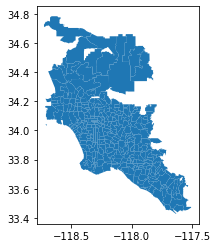

In [29]:
gdf_merged_ev_percentage.plot()

In [ ]:
#merged_ev_percentage.to_csv(r'merged_ev_percentage.csv')

## Merging Cluster Table

In [30]:
clusters = gpd.read_file(r'data/chargers_socal_acs_kmeans.geojson')

In [31]:
clusters =  clusters.to_crs(epsg=3857)

In [32]:
clusters.columns

Index(['Connections_0_LevelID', 'Connections_0_PowerKW',
       'Connections_0_Quantity', 'betweenness_centrality',
       'closeness_centrality', 'degree_centrality', 'median_age',
       'median_hh_income', 'total_pop', 'hh_total', 'avg_travel_time',
       'pct_white', 'pct_black', 'pct_asian', 'pct_hispanic', 'pct_bachelor',
       'pct_access_to_veh', 'pct_30-34_min', 'pct_45-49_min', 'k', 'geometry'],
      dtype='object')

In [33]:
clusters_filtered = clusters[['k', 'geometry', 'median_age',
       'median_hh_income', 'total_pop', 'hh_total', 'avg_travel_time',
       'pct_white', 'pct_black', 'pct_asian', 'pct_hispanic', 'pct_bachelor',
       'pct_access_to_veh', 'pct_30-34_min', 'pct_45-49_min']]

In [34]:
clusters_filtered.head()

,k,geometry,median_age,median_hh_income,total_pop,hh_total,avg_travel_time,pct_white,pct_black,pct_asian,pct_hispanic,pct_bachelor,pct_access_to_veh,pct_30-34_min,pct_45-49_min
0,4,POINT (inf inf),38.2,82479.0,7403.0,7403.0,37.507692,71.444009,0.742942,5.916520,79.022018,3.620154,39.511009,8.955829,6.038093
1,4,POINT (inf inf),34.0,79353.0,4677.0,4677.0,36.647500,61.364122,4.639726,5.687406,72.567885,1.325636,42.762455,8.210391,5.986744
2,4,POINT (inf inf),38.5,68388.0,4141.0,4141.0,41.035928,65.563873,3.018595,8.741850,72.856798,0.941801,40.328423,8.452065,4.998793
3,4,POINT (inf inf),38.2,82479.0,7403.0,7403.0,37.507692,71.444009,0.742942,5.916520,79.022018,3.620154,39.511009,8.955829,6.038093
4,4,POINT (inf inf),38.5,68388.0,4141.0,4141.0,41.035928,65.563873,3.018595,8.741850,72.856798,0.941801,40.328423,8.452065,4.998793


In [35]:
type(clusters_filtered)

geopandas.geodataframe.GeoDataFrame

In [36]:
clusters_filtered.crs, gdf_merged_ev_percentage.crs

(<Projected CRS: EPSG:3857>
 Name: WGS 84 / Pseudo-Mercator
 Axis Info [cartesian]:
 - X[east]: Easting (metre)
 - Y[north]: Northing (metre)
 Area of Use:
 - name: World between 85.06°S and 85.06°N.
 - bounds: (-180.0, -85.06, 180.0, 85.06)
 Coordinate Operation:
 - name: Popular Visualisation Pseudo-Mercator
 - method: Popular Visualisation Pseudo Mercator
 Datum: World Geodetic System 1984
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich,
 <Geographic 2D CRS: EPSG:4269>
 Name: NAD83
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Id

<AxesSubplot:>

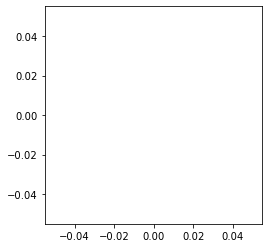

In [37]:
clusters_filtered.plot()

<AxesSubplot:>

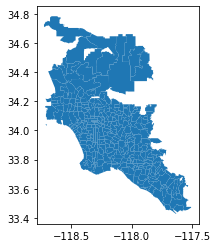

In [38]:
gdf_merged_ev_percentage.plot()

In [39]:
gdf_merged_ev_percentage = gdf_merged_ev_percentage.to_crs(epsg=3857)

<AxesSubplot:>

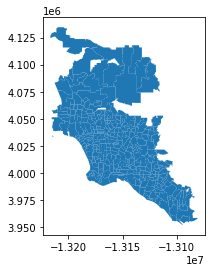

In [40]:
# axis should have 6digit values!

gdf_merged_ev_percentage.plot()

In [41]:
#ev population share
chargers_and_ev_percentage = gpd.sjoin(clusters_filtered, gdf_merged_ev_percentage, how='inner', op='within')

In [42]:
# should have 2331 rows!

chargers_and_ev_percentage.shape

(0, 31)

In [43]:
# lost a few nodes, should be fine!

clusters_filtered.shape

(2421, 15)

In [44]:
chargers_and_ev_percentage.columns

Index(['k', 'geometry', 'median_age', 'median_hh_income', 'total_pop',
       'hh_total', 'avg_travel_time', 'pct_white', 'pct_black', 'pct_asian',
       'pct_hispanic', 'pct_bachelor', 'pct_access_to_veh', 'pct_30-34_min',
       'pct_45-49_min', 'index_right', 'Zip Code', 'Electric Vehicles',
       'Total Vehicles', 'EV Percentage', 'STATEFP10', 'ZCTA5CE10', 'GEOID10',
       'CLASSFP10', 'MTFCC10', 'FUNCSTAT10', 'ALAND10', 'AWATER10',
       'INTPTLAT10', 'INTPTLON10', 'PARTFLG10'],
      dtype='object')

In [45]:
# write to file

chargers_and_ev_percentage.to_file('data/chargers_socal_acs_kmeans_zipcode_ev_percentage.geojson', driver='GeoJSON')

ValueError: Cannot write empty DataFrame to file.

In [46]:
chargers_and_ev_percentage = gpd.read_file('data/chargers_socal_acs_kmeans_zipcode_ev_percentage.geojson')
chargers_and_ev_percentage.shape

(2331, 31)

In [47]:
# 3857 

chargers_and_ev_percentage.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [48]:
chargers_and_ev_percentage

,k,median_age,median_hh_income,total_pop,hh_total,avg_travel_time,pct_white,pct_black,pct_asian,pct_hispanic,...,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,PARTFLG10,geometry
0,4,38.2,82479.0,7403.0,7403.0,37.507692,71.444009,0.742942,5.916520,79.022018,...,0690241,B5,G6350,S,12758123,171073,+33.9408842,-118.1286281,N,POINT (-13150927.752 4022419.156)
1,4,34.0,79353.0,4677.0,4677.0,36.647500,61.364122,4.639726,5.687406,72.567885,...,0690241,B5,G6350,S,12758123,171073,+33.9408842,-118.1286281,N,POINT (-13151894.228 4021593.974)
2,4,38.5,68388.0,4141.0,4141.0,41.035928,65.563873,3.018595,8.741850,72.856798,...,0690241,B5,G6350,S,12758123,171073,+33.9408842,-118.1286281,N,POINT (-13150584.777 4020982.831)
3,4,38.2,82479.0,7403.0,7403.0,37.507692,71.444009,0.742942,5.916520,79.022018,...,0690241,B5,G6350,S,12758123,171073,+33.9408842,-118.1286281,N,POINT (-13152527.636 4021727.897)
4,4,38.5,68388.0,4141.0,4141.0,41.035928,65.563873,3.018595,8.741850,72.856798,...,0690241,B5,G6350,S,12758123,171073,+33.9408842,-118.1286281,N,POINT (-13150084.273 4020856.149)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2326,1,45.5,154417.0,6700.0,6700.0,32.309021,83.283582,0.283582,7.179104,12.567164,...,0692673,B5,G6350,S,30253137,21836,+33.4673720,-117.6135088,N,POINT (-13092077.145 3956912.621)
2327,1,45.5,154417.0,6700.0,6700.0,32.309021,83.283582,0.283582,7.179104,12.567164,...,0692673,B5,G6350,S,30253137,21836,+33.4673720,-117.6135088,N,POINT (-13091912.726 3955831.158)
2328,1,45.5,154417.0,6700.0,6700.0,32.309021,83.283582,0.283582,7.179104,12.567164,...,0692673,B5,G6350,S,30253137,21836,+33.4673720,-117.6135088,N,POINT (-13091912.726 3955831.158)
2329,2,44.8,86853.0,5175.0,5175.0,33.161058,78.106280,0.154589,4.676329,23.806763,...,0692673,B5,G6350,S,30253137,21836,+33.4673720,-117.6135088,N,POINT (-13092023.934 3955301.872)


In [49]:
#merging with zipcode data
socal_acs_tract_on_zipcode = gpd.read_file('data/socal_acs_tract_on_zipcode.geojson')

In [50]:
socal_acs_tract_on_zipcode.columns

Index(['GEOID', 'total_hispanic', 'median_age', 'total_pop', 'total_pop_white',
       'total_pop_black', 'total_pop_asian', '30-34_min', '45-49_min',
       'agg_travel_time', 'total_veh_available', 'access_to_vehicle',
       'hh_total', 'total_bachelor', 'median_hh_income', 'NAME', 'state',
       'county', 'tract', 'avg_travel_time', 'pct_white', 'pct_black',
       'pct_asian', 'pct_hispanic', 'pct_bachelor', 'pct_access_to_veh',
       'pct_30-34_min', 'pct_45-49_min', 'index_right', 'STATEFP10',
       'ZCTA5CE10', 'GEOID10', 'CLASSFP10', 'MTFCC10', 'FUNCSTAT10', 'ALAND10',
       'AWATER10', 'INTPTLAT10', 'INTPTLON10', 'PARTFLG10', 'geometry'],
      dtype='object')

In [51]:
zip_to_tract = socal_acs_tract_on_zipcode[['tract','ZCTA5CE10']]
zip_to_tract

,tract,ZCTA5CE10
0,670403,90275
1,670701,90275
2,670407,90275
3,670411,90275
4,670413,90275
...,...,...
2748,021922,92808
2749,021921,92808
2750,063006,92662
2751,062614,92617


In [52]:
zip_to_tract['tract'] = zip_to_tract['tract'].astype(float)

<ipython-input-52-57f44e95b406>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zip_to_tract['tract'] = zip_to_tract['tract'].astype(float)


In [53]:
zip_to_tract

,tract,ZCTA5CE10
0,670403.0,90275
1,670701.0,90275
2,670407.0,90275
3,670411.0,90275
4,670413.0,90275
...,...,...
2748,21922.0,92808
2749,21921.0,92808
2750,63006.0,92662
2751,62614.0,92617


In [54]:
#zip to tract population percentages
zip_to_tract_perc = pd.read_csv (r'data/ZIP_TRACT_032010.csv')

In [55]:
zip_to_tract_perc

,ZIP,TRACT,RES_RATIO,BUS_RATIO,OTH_RATIO,TOT_RATIO
0,501,36103158607,0.000000,1.000000,0.000000,1.000000
1,544,36103158607,0.000000,1.000000,0.000000,1.000000
2,601,72001956300,0.004316,0.005063,0.000000,0.004310
3,601,72001956600,0.728760,0.448101,0.546667,0.703202
4,601,72001956700,0.266924,0.546835,0.453333,0.292488
...,...,...,...,...,...,...
145624,99925,2201000200,0.000000,0.000000,1.000000,1.000000
145625,99926,2201000400,0.000000,0.000000,1.000000,1.000000
145626,99927,2201000100,0.000000,0.000000,1.000000,1.000000
145627,99928,2130000100,0.000000,0.000000,1.000000,1.000000


In [56]:
zip_to_tract_perc_socal = zip_to_tract_perc[zip_to_tract_perc['ZIP'].isin(zip_to_tract['ZCTA5CE10'])]
zip_to_tract_perc_socal

,ZIP,TRACT,RES_RATIO,BUS_RATIO,OTH_RATIO,TOT_RATIO
127911,90001,6037239200,0.000000,0.102041,0.025126,0.011305
127912,90001,6037239330,0.000000,0.060587,0.020101,0.006849
127913,90001,6037239500,0.094094,0.036990,0.025126,0.086315
127914,90001,6037239800,0.100367,0.028061,0.140704,0.093896
127915,90001,6037240010,0.000918,0.014031,0.005025,0.002394
...,...,...,...,...,...,...
135300,93552,6037910901,0.000181,0.000000,0.000000,0.000177
135301,93553,6037910000,0.005435,0.111111,0.000000,0.007937
135302,93553,6037910901,0.285326,0.000000,0.000000,0.277778
135303,93553,6037910902,0.665761,0.777778,1.000000,0.669312


In [57]:
zip_to_tract_perc_socal['TRACT'] = zip_to_tract_perc_socal['TRACT'].astype(str)
zip_to_tract_perc_socal['TRACT'] = [x.replace(x[:3], '') for x in zip_to_tract_perc_socal['TRACT']]
zip_to_tract_perc_socal['TRACT'] = zip_to_tract_perc_socal['TRACT'].astype(float)

<ipython-input-57-2cbfbde90b55>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zip_to_tract_perc_socal['TRACT'] = zip_to_tract_perc_socal['TRACT'].astype(str)
<ipython-input-57-2cbfbde90b55>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zip_to_tract_perc_socal['TRACT'] = [x.replace(x[:3], '') for x in zip_to_tract_perc_socal['TRACT']]
<ipython-input-57-2cbfbde90b55>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [58]:
zip_to_tract_perc_socal

,ZIP,TRACT,RES_RATIO,BUS_RATIO,OTH_RATIO,TOT_RATIO
127911,90001,7239200.0,0.000000,0.102041,0.025126,0.011305
127912,90001,7239330.0,0.000000,0.060587,0.020101,0.006849
127913,90001,7239500.0,0.094094,0.036990,0.025126,0.086315
127914,90001,7239800.0,0.100367,0.028061,0.140704,0.093896
127915,90001,7240010.0,0.000918,0.014031,0.005025,0.002394
...,...,...,...,...,...,...
135300,93552,7910901.0,0.000181,0.000000,0.000000,0.000177
135301,93553,7910000.0,0.005435,0.111111,0.000000,0.007937
135302,93553,7910901.0,0.285326,0.000000,0.000000,0.277778
135303,93553,7910902.0,0.665761,0.777778,1.000000,0.669312


In [59]:
zip_to_tract

,tract,ZCTA5CE10
0,670403.0,90275
1,670701.0,90275
2,670407.0,90275
3,670411.0,90275
4,670413.0,90275
...,...,...
2748,21922.0,92808
2749,21921.0,92808
2750,63006.0,92662
2751,62614.0,92617


# Analysis

## K-Means Chargers and EV Percentages

Combining K-means clustering of chargers with the EV registration data.

In [60]:
chargers_and_ev_percentage.columns

Index(['k', 'median_age', 'median_hh_income', 'total_pop', 'hh_total',
       'avg_travel_time', 'pct_white', 'pct_black', 'pct_asian',
       'pct_hispanic', 'pct_bachelor', 'pct_access_to_veh', 'pct_30-34_min',
       'pct_45-49_min', 'index_right', 'Zip Code', 'Electric Vehicles',
       'Total Vehicles', 'EV Percentage', 'STATEFP10', 'ZCTA5CE10', 'GEOID10',
       'CLASSFP10', 'MTFCC10', 'FUNCSTAT10', 'ALAND10', 'AWATER10',
       'INTPTLAT10', 'INTPTLON10', 'PARTFLG10', 'geometry'],
      dtype='object')

In [61]:
chargers_and_ev_percentage_simple = chargers_and_ev_percentage[['k', 'median_age', 'median_hh_income', 'total_pop', 'hh_total',
       'avg_travel_time', 'pct_white', 'pct_black', 'pct_asian',
       'pct_hispanic', 'pct_bachelor', 'pct_access_to_veh', 'pct_30-34_min',
       'pct_45-49_min','Zip Code', 'Electric Vehicles',
       'Total Vehicles', 'EV Percentage']]

In [62]:
#bringing in zipcode population

!pip install uszipcode

In [63]:
from uszipcode import SearchEngine
search = SearchEngine(simple_zipcode=True)

In [64]:
population = []

for zipcode in chargers_and_ev_percentage_simple['Zip Code']:
    zipcode = search.by_zipcode(zipcode)
    zipcode = zipcode.to_dict()
    population.append(zipcode.get('population'))

In [65]:
chargers_and_ev_percentage_simple['population'] = population

<ipython-input-65-c61fc3d1ee49>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chargers_and_ev_percentage_simple['population'] = population


In [66]:
population_density = []

for zipcode in chargers_and_ev_percentage_simple['Zip Code']:
    zipcode = search.by_zipcode(zipcode)
    zipcode = zipcode.to_dict()
    population_density.append(zipcode.get('population_density'))
    
chargers_and_ev_percentage_simple['population_density'] = population_density

<ipython-input-66-72ff26f5fd13>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chargers_and_ev_percentage_simple['population_density'] = population_density


In [67]:
chargers_and_ev_percentage_simple

,k,median_age,median_hh_income,total_pop,hh_total,avg_travel_time,pct_white,pct_black,pct_asian,pct_hispanic,pct_bachelor,pct_access_to_veh,pct_30-34_min,pct_45-49_min,Zip Code,Electric Vehicles,Total Vehicles,EV Percentage,population,population_density
0,4,38.2,82479.0,7403.0,7403.0,37.507692,71.444009,0.742942,5.916520,79.022018,3.620154,39.511009,8.955829,6.038093,90241,740.0,66448.0,0.011137,42399,8607.0
1,4,34.0,79353.0,4677.0,4677.0,36.647500,61.364122,4.639726,5.687406,72.567885,1.325636,42.762455,8.210391,5.986744,90241,740.0,66448.0,0.011137,42399,8607.0
2,4,38.5,68388.0,4141.0,4141.0,41.035928,65.563873,3.018595,8.741850,72.856798,0.941801,40.328423,8.452065,4.998793,90241,740.0,66448.0,0.011137,42399,8607.0
3,4,38.2,82479.0,7403.0,7403.0,37.507692,71.444009,0.742942,5.916520,79.022018,3.620154,39.511009,8.955829,6.038093,90241,740.0,66448.0,0.011137,42399,8607.0
4,4,38.5,68388.0,4141.0,4141.0,41.035928,65.563873,3.018595,8.741850,72.856798,0.941801,40.328423,8.452065,4.998793,90241,740.0,66448.0,0.011137,42399,8607.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2326,1,45.5,154417.0,6700.0,6700.0,32.309021,83.283582,0.283582,7.179104,12.567164,0.000000,38.880597,5.716418,5.268657,92673,2268.0,50462.0,0.044945,29309,2509.0
2327,1,45.5,154417.0,6700.0,6700.0,32.309021,83.283582,0.283582,7.179104,12.567164,0.000000,38.880597,5.716418,5.268657,92673,2268.0,50462.0,0.044945,29309,2509.0
2328,1,45.5,154417.0,6700.0,6700.0,32.309021,83.283582,0.283582,7.179104,12.567164,0.000000,38.880597,5.716418,5.268657,92673,2268.0,50462.0,0.044945,29309,2509.0
2329,2,44.8,86853.0,5175.0,5175.0,33.161058,78.106280,0.154589,4.676329,23.806763,0.444444,40.193237,4.193237,8.772947,92673,2268.0,50462.0,0.044945,29309,2509.0


### Median Income Lens

In [68]:
chargers_and_ev_percentage_simple['percentage'] = chargers_and_ev_percentage_simple['Electric Vehicles']/chargers_and_ev_percentage_simple['population']

<ipython-input-68-1d0e75cfc5e3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chargers_and_ev_percentage_simple['percentage'] = chargers_and_ev_percentage_simple['Electric Vehicles']/chargers_and_ev_percentage_simple['population']


In [69]:
chargers_and_ev_percentage_simple = chargers_and_ev_percentage_simple[chargers_and_ev_percentage_simple['percentage']<100]

In [70]:
agg_median = chargers_and_ev_percentage_simple.groupby(['k','Zip Code']).mean()[['percentage','median_hh_income']]
agg_median = agg_median.groupby('k').mean()

Text(0, 0.5, 'Zip Code Median Income')

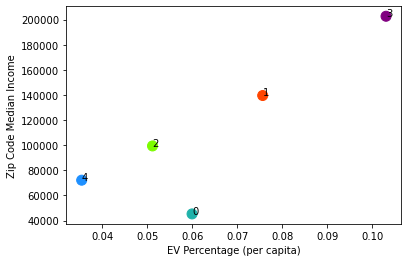

In [99]:
fig, ax = plt.subplots()
ax.scatter(agg_median['percentage'],agg_median['median_hh_income'],s=100,
          c = ["lightseagreen", "orangered", "lawngreen", "purple", "dodgerblue"])
for i, txt in enumerate(agg_median.index):
    ax.annotate(txt, (agg_median['percentage'][i], 
                      agg_median['median_hh_income'][i]))
    
plt.xlabel('EV Percentage (per capita)')
plt.ylabel('Zip Code Median Income')

### Total Population Lens

In [74]:
chargers_and_ev_percentage_simple

,k,median_age,median_hh_income,total_pop,hh_total,avg_travel_time,pct_white,pct_black,pct_asian,pct_hispanic,...,pct_access_to_veh,pct_30-34_min,pct_45-49_min,Zip Code,Electric Vehicles,Total Vehicles,EV Percentage,population,population_density,percentage
0,4,38.2,82479.0,7403.0,7403.0,37.507692,71.444009,0.742942,5.916520,79.022018,...,39.511009,8.955829,6.038093,90241,740.0,66448.0,0.011137,42399,8607.0,0.017453
1,4,34.0,79353.0,4677.0,4677.0,36.647500,61.364122,4.639726,5.687406,72.567885,...,42.762455,8.210391,5.986744,90241,740.0,66448.0,0.011137,42399,8607.0,0.017453
2,4,38.5,68388.0,4141.0,4141.0,41.035928,65.563873,3.018595,8.741850,72.856798,...,40.328423,8.452065,4.998793,90241,740.0,66448.0,0.011137,42399,8607.0,0.017453
3,4,38.2,82479.0,7403.0,7403.0,37.507692,71.444009,0.742942,5.916520,79.022018,...,39.511009,8.955829,6.038093,90241,740.0,66448.0,0.011137,42399,8607.0,0.017453
4,4,38.5,68388.0,4141.0,4141.0,41.035928,65.563873,3.018595,8.741850,72.856798,...,40.328423,8.452065,4.998793,90241,740.0,66448.0,0.011137,42399,8607.0,0.017453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2326,1,45.5,154417.0,6700.0,6700.0,32.309021,83.283582,0.283582,7.179104,12.567164,...,38.880597,5.716418,5.268657,92673,2268.0,50462.0,0.044945,29309,2509.0,0.077382
2327,1,45.5,154417.0,6700.0,6700.0,32.309021,83.283582,0.283582,7.179104,12.567164,...,38.880597,5.716418,5.268657,92673,2268.0,50462.0,0.044945,29309,2509.0,0.077382
2328,1,45.5,154417.0,6700.0,6700.0,32.309021,83.283582,0.283582,7.179104,12.567164,...,38.880597,5.716418,5.268657,92673,2268.0,50462.0,0.044945,29309,2509.0,0.077382
2329,2,44.8,86853.0,5175.0,5175.0,33.161058,78.106280,0.154589,4.676329,23.806763,...,40.193237,4.193237,8.772947,92673,2268.0,50462.0,0.044945,29309,2509.0,0.077382


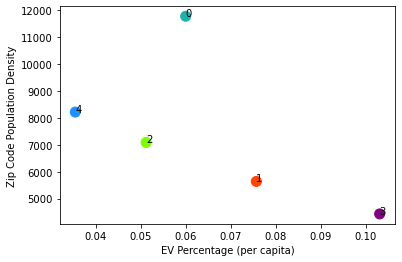

In [93]:
agg_pop = chargers_and_ev_percentage_simple.groupby(['k','Zip Code']).mean()[['percentage','population_density']]
agg_pop = agg_pop.groupby('k').mean()

#fig, ax = plt.subplots()
plt.scatter(agg_pop['percentage'],agg_pop['population_density'],s=100,
            c = ["lightseagreen", "orangered", "lawngreen", "purple", "dodgerblue"])
for i, txt in enumerate(agg_median.index):
    plt.annotate(txt, (agg_pop['percentage'][i], 
                      agg_pop['population_density'][i]))
    
plt.xlabel('EV Percentage (per capita)')
plt.ylabel('Zip Code Population Density')
plt.show()

In [80]:
chargers_and_ev_percentage_simple[['Zip Code','EV Percentage']].groupby(
    'Zip Code').mean().sort_values('EV Percentage',ascending=False)

,EV Percentage
Zip Code,
90402,0.091677
92657,0.090281
90272,0.082643
90077,0.081145
90067,0.079590
...,...
90270,0.002119
90059,0.002110
90001,0.001985
